Задача для бизнеса: Прогнозирование оттока клиентов в компании, предоставляющей подписные услуги (например, телекоммуникационные компании, стриминговые сервисы и т.д.).

### Бизнес-задача:
Отток клиентов представляет собой проблему для многих компаний, предоставляющих подписные услуги. Снижение оттока позволяет сократить затраты на привлечение новых клиентов и увеличить доходы компании. Цель бизнес-задачи - предсказать, какие клиенты с наибольшей вероятностью прекратят свои подписки, чтобы принять меры для их удержания.

### Задача машинного обучения:
Разработать модель машинного обучения для предсказания оттока клиентов. Задача будет заключаться в классификации клиентов на две категории: остаются или уходят.

### Дата-сет:
Для решения этой задачи можно использовать публично доступный набор данных о клиентах телекоммуникационной компании.

**Набор данных:** [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

### Описание дата-сета:
Набор данных содержит информацию о клиентах, такие как демографические данные, информацию о договорах, услуги, которые клиенты подписывают, а также статус оттока. Основные столбцы в дата-сете включают:
- `customerID` - уникальный идентификатор клиента
- `gender` - пол клиента
- `SeniorCitizen` - является ли клиент пожилым человеком
- `Partner` - наличие партнера
- `Dependents` - наличие иждивенцев
- `tenure` - длительность подписки в месяцах
- `PhoneService` - наличие телефонной связи
- `MultipleLines` - наличие нескольких линий
- `InternetService` - тип интернет-сервиса
- `OnlineSecurity` - наличие онлайн безопасности
- `OnlineBackup` - наличие онлайн резервного копирования
- `DeviceProtection` - наличие защиты устройств
- `TechSupport` - наличие технической поддержки
- `StreamingTV` - наличие стримингового телевидения
- `StreamingMovies` - наличие стриминга фильмов
- `Contract` - тип контракта (месячный, годовой и т.д.)
- `PaperlessBilling` - наличие безбумажного счета
- `PaymentMethod` - метод оплаты
- `MonthlyCharges` - ежемесячные расходы
- `TotalCharges` - общие расходы
- `Churn` - факт оттока (целевая переменная)

### Решение задачи:
1. Исследование и подготовка данных.
2. Построение модели машинного обучения для классификации клиентов.
3. Оценка модели и оптимизация.
4. Внедрение модели для прогнозирования и принятия решений по удержанию клиентов.




In [50]:
import pandas as pd


dataset = "WA_Fn-UseC_-Telco-Customer-Churn (1).csv"
df = pd.read_csv(dataset)


df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:

df.info()


df.describe()


df.isnull().sum()


for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


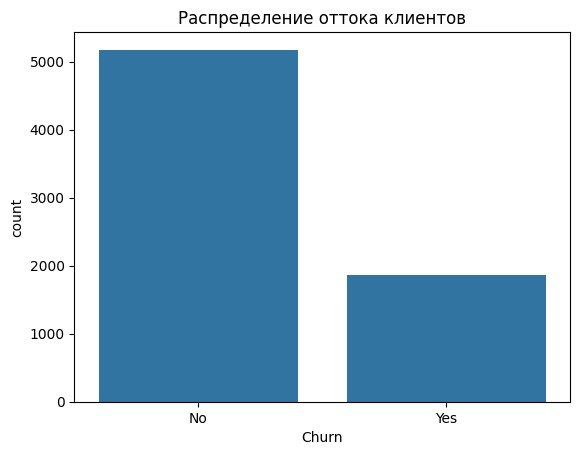

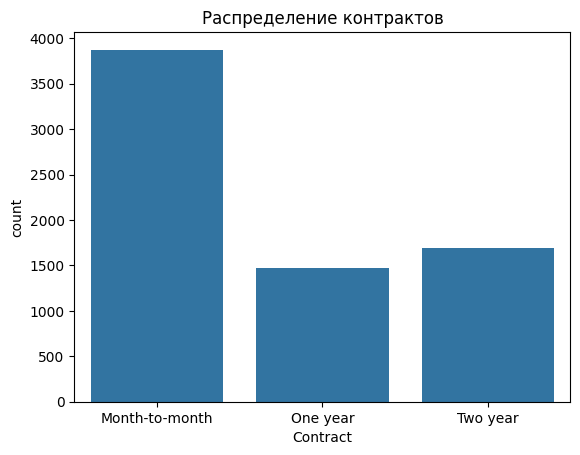

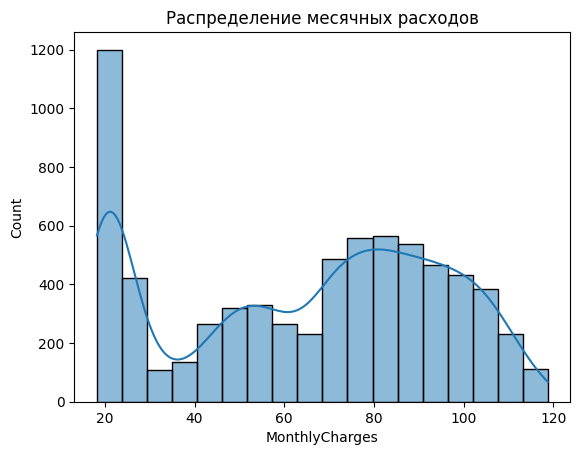

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title('Распределение оттока клиентов')
plt.show()

sns.countplot(x='Contract', data=df)
plt.title('Распределение контрактов')
plt.show()

sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Распределение месячных расходов')
plt.show()


In [53]:
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

df_encoded.isnull().sum().sum()

from sklearn.preprocessing import StandardScaler
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded.head()

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded.head()


C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\238142834.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


# Предобработка

In [54]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


print(f"Пропущенные значения в TotalCharges: {df['TotalCharges'].isnull().sum()}")

Пропущенные значения в TotalCharges: 0


In [55]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print(f"Пропущенные значения в TotalCharges после заполнения: {df['TotalCharges'].isnull().sum()}")

Пропущенные значения в TotalCharges после заполнения: 0


C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\1218791979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [56]:
# Преобразование категориальных переменных в числовые с использованием one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)


In [57]:
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


# EDA

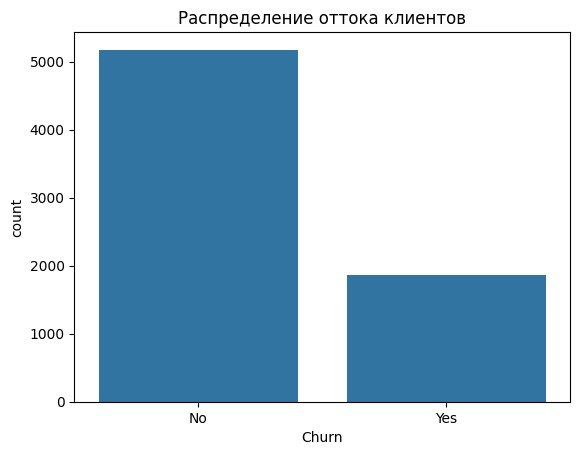

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [58]:
# Распределение целевой переменной
sns.countplot(x='Churn', data=df)
plt.title('Распределение оттока клиентов')
plt.show()

# Процентное соотношение классов
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentage)


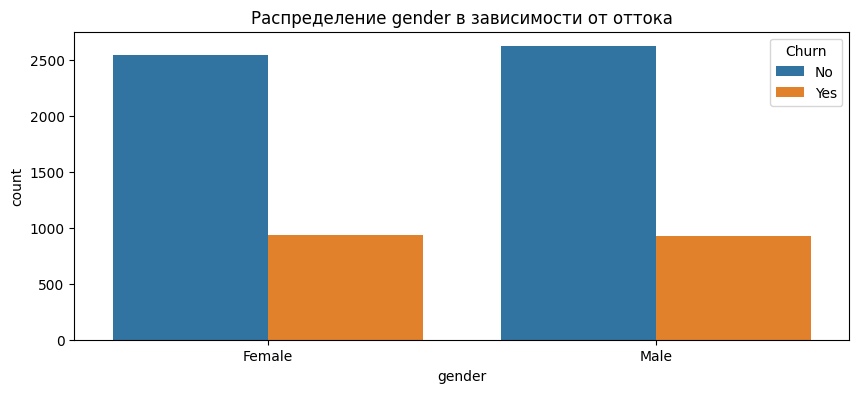

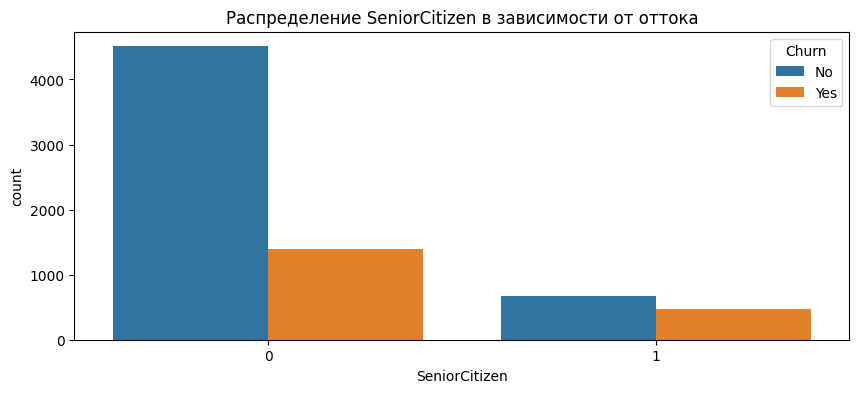

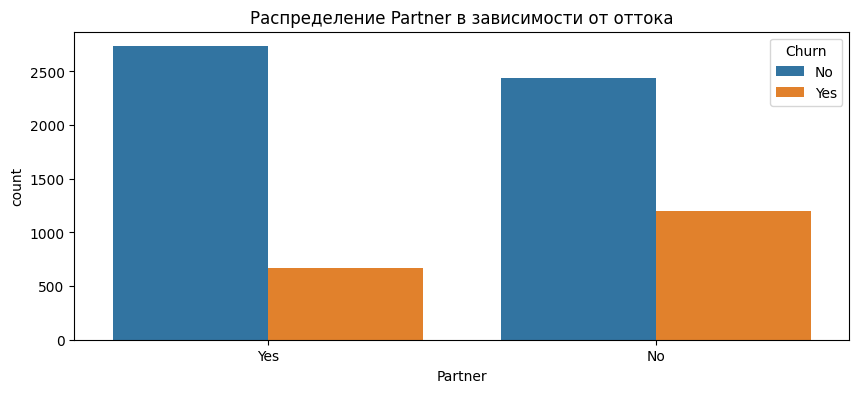

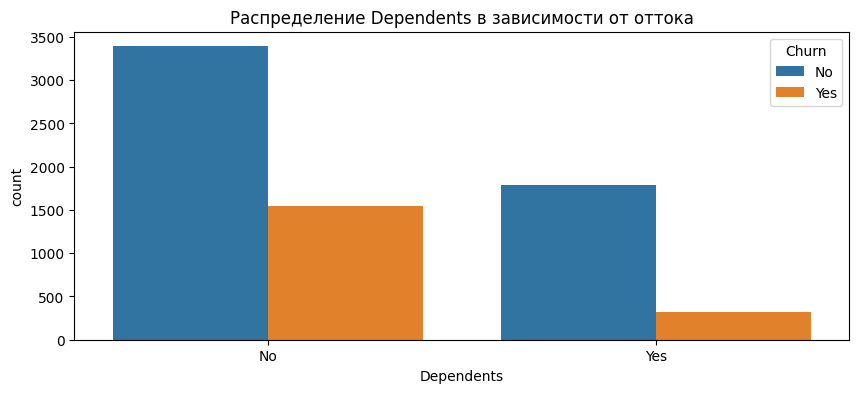

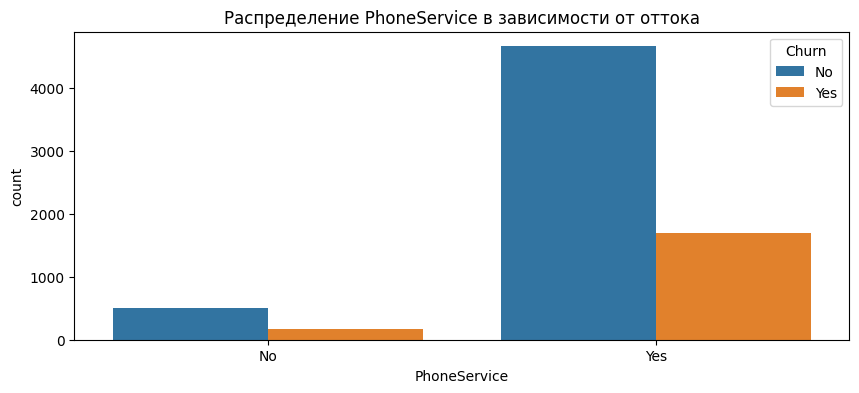

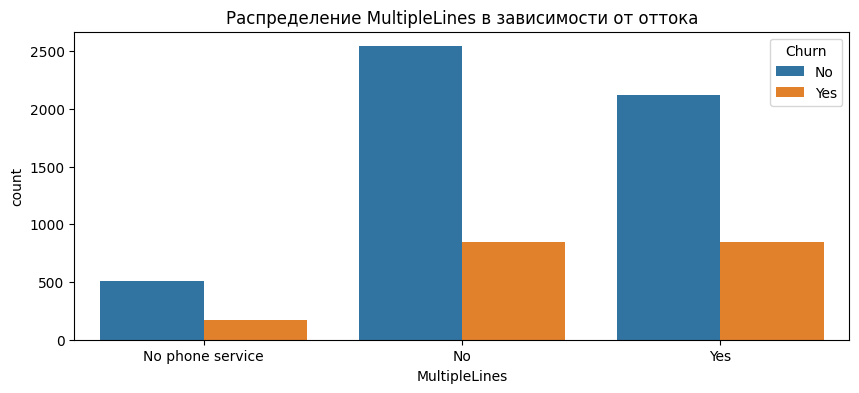

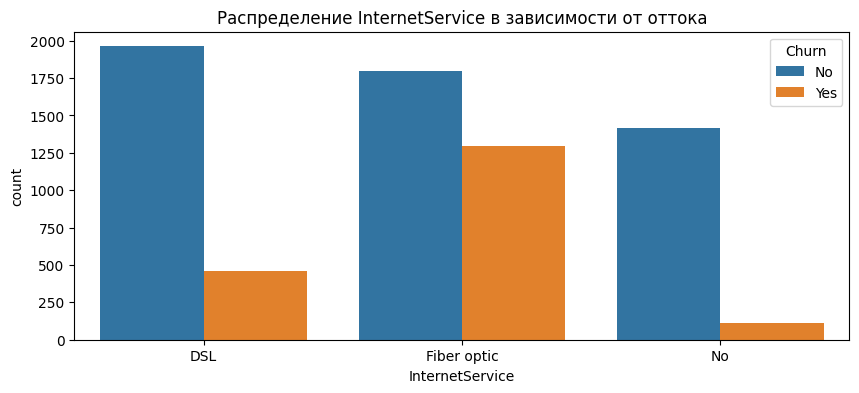

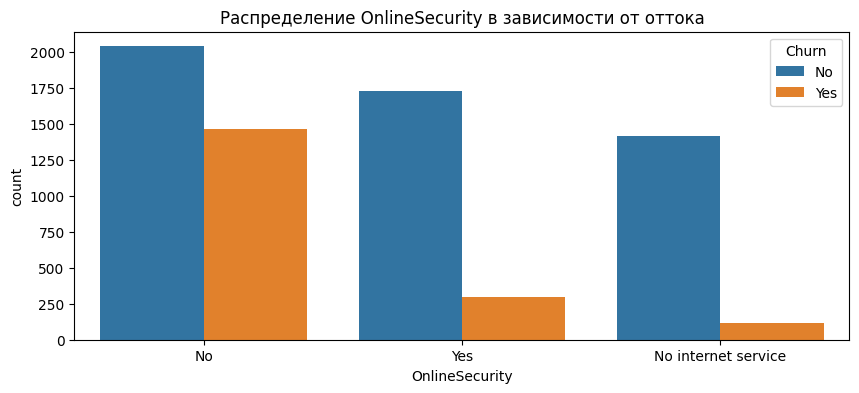

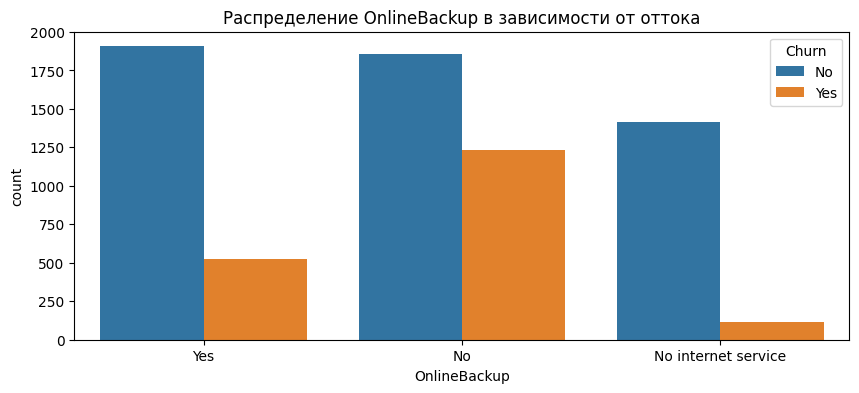

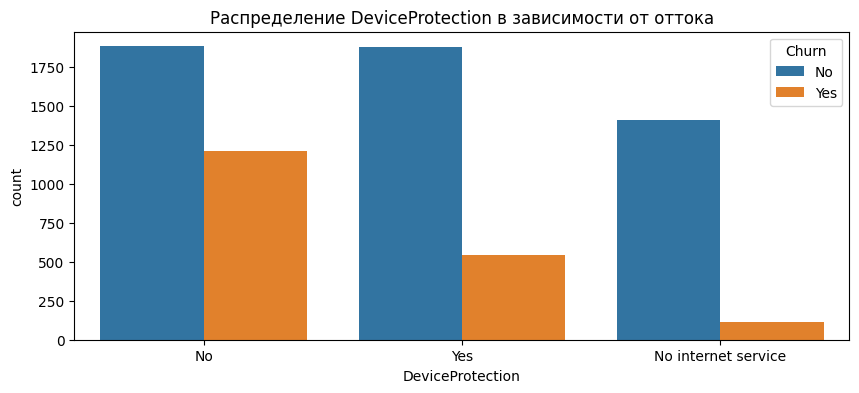

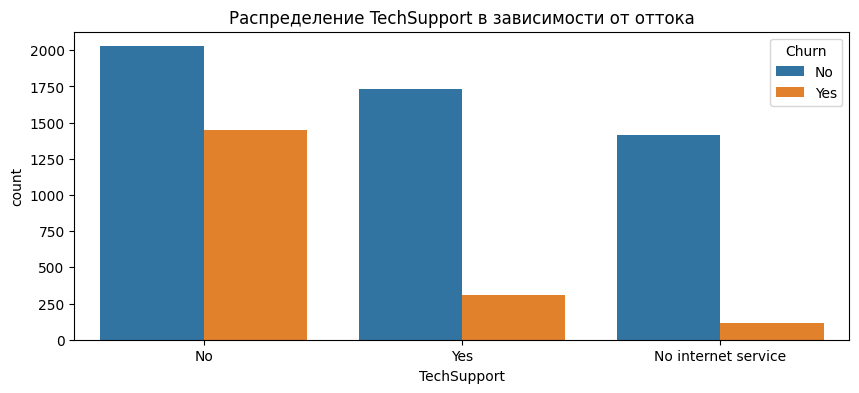

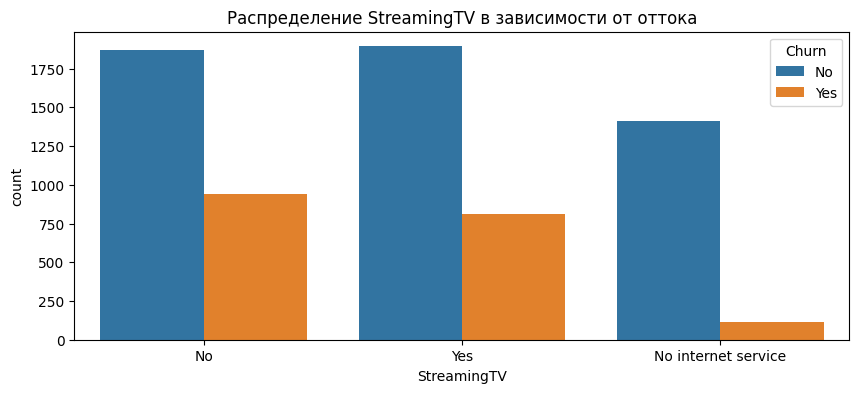

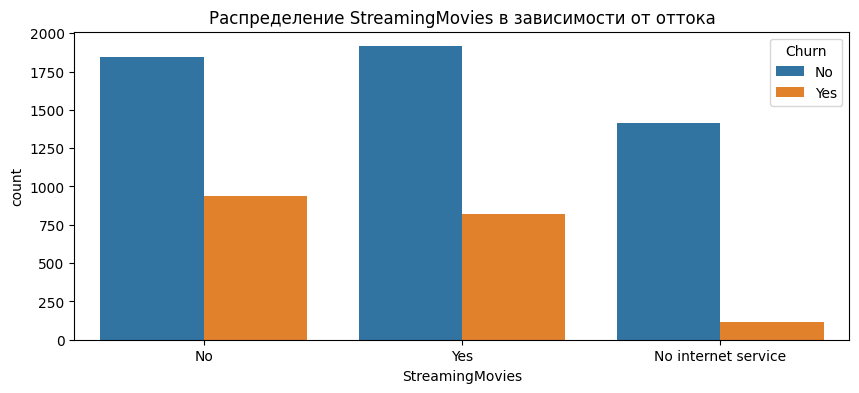

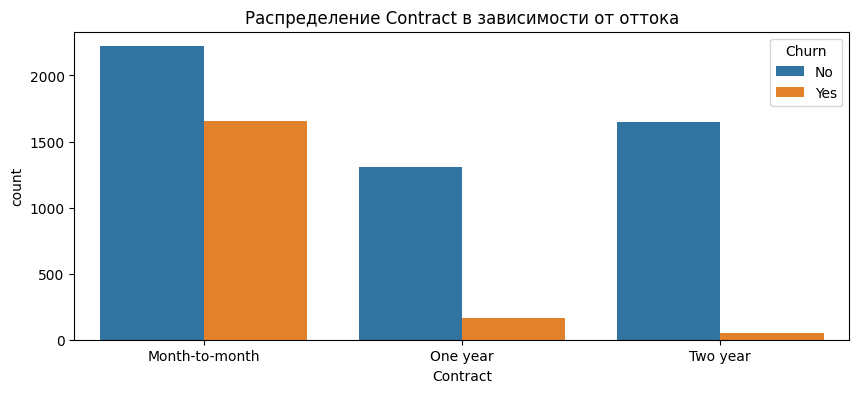

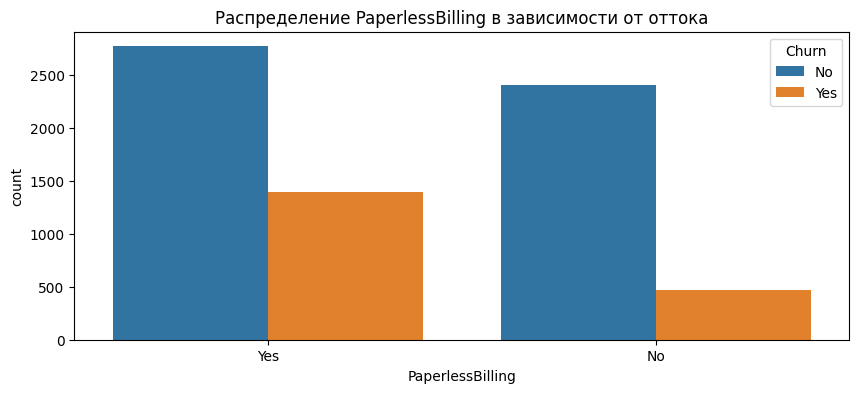

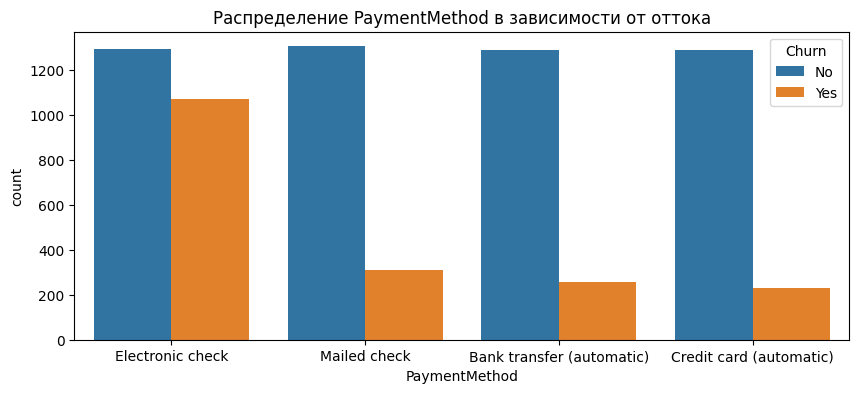

In [59]:
# Функция для построения графиков распределения категориальных переменных
def plot_categorical_distribution(data, columns):
    for column in columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=column, hue='Churn', data=data)
        plt.title(f'Распределение {column} в зависимости от оттока')
        plt.show()

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

plot_categorical_distribution(df, categorical_columns)


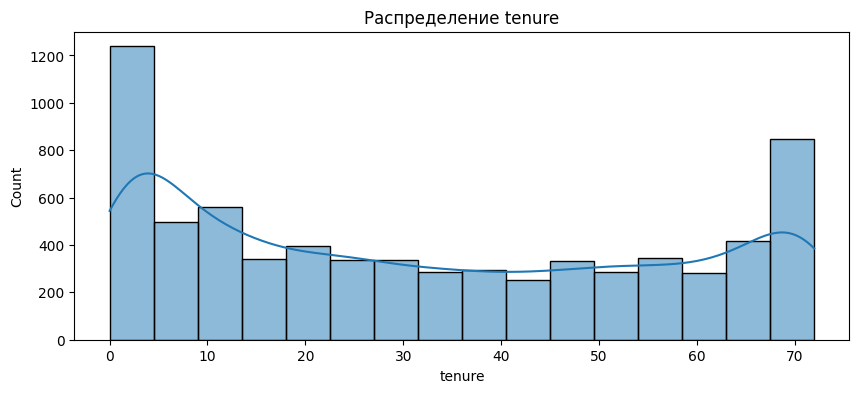

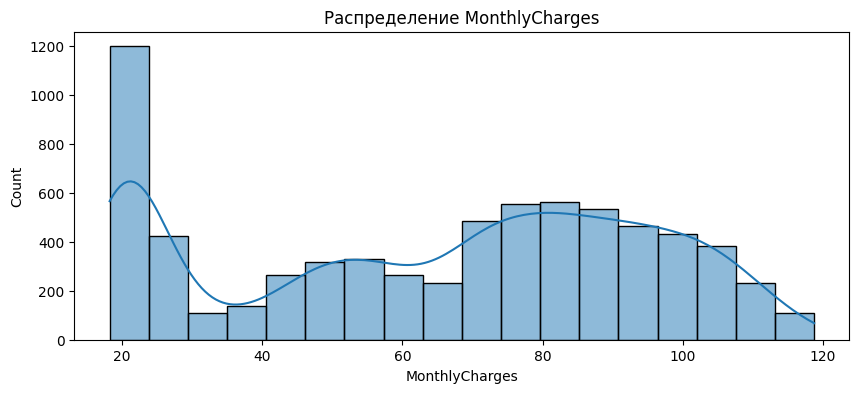

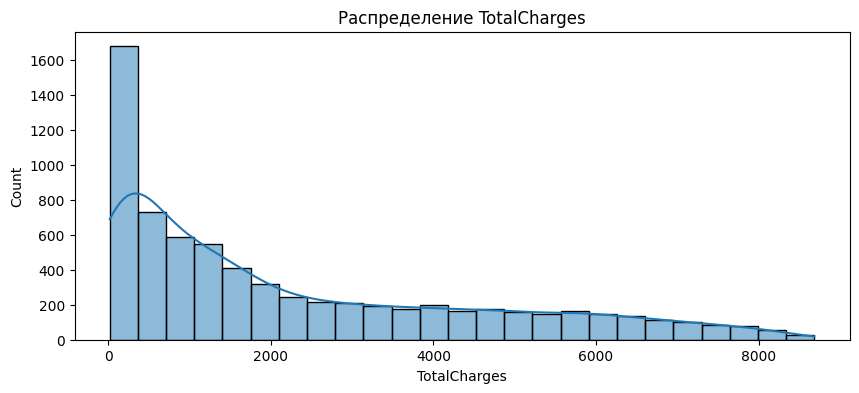

In [60]:
# Функция для построения графиков распределения числовых переменных
def plot_numerical_distribution(data, columns):
    for column in columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(data[column], kde=True)
        plt.title(f'Распределение {column}')
        plt.show()

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
plot_numerical_distribution(df, numerical_columns)


C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\2505905564.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


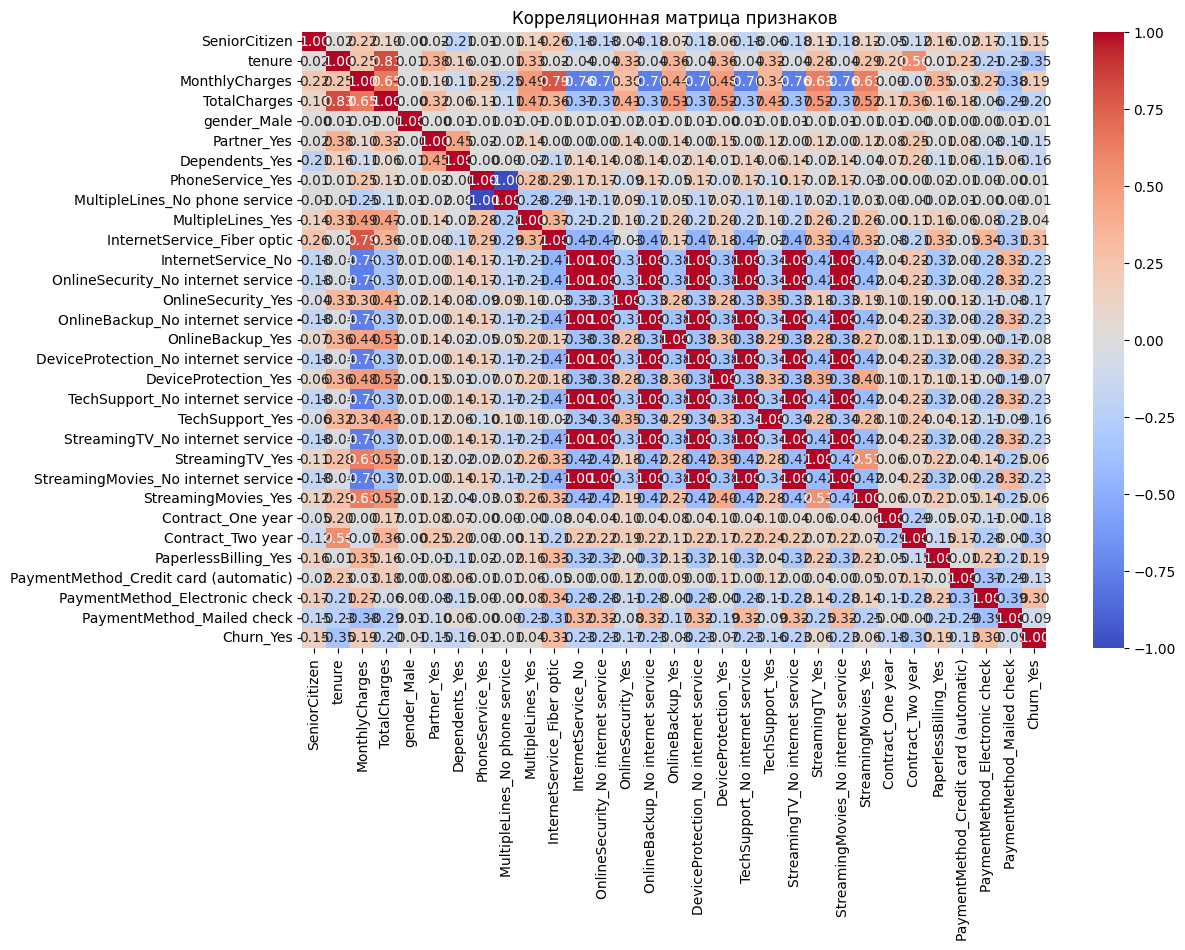

In [61]:
# Преобразование столбца TotalCharges в числовой тип
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Заполнение пропусков медианным значением
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Преобразование категориальных переменных в числовые с использованием one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

# Масштабирование числовых признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Корреляционная матрица только для числовых признаков
corr_matrix = df_encoded.corr()

# Тепловая карта корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()


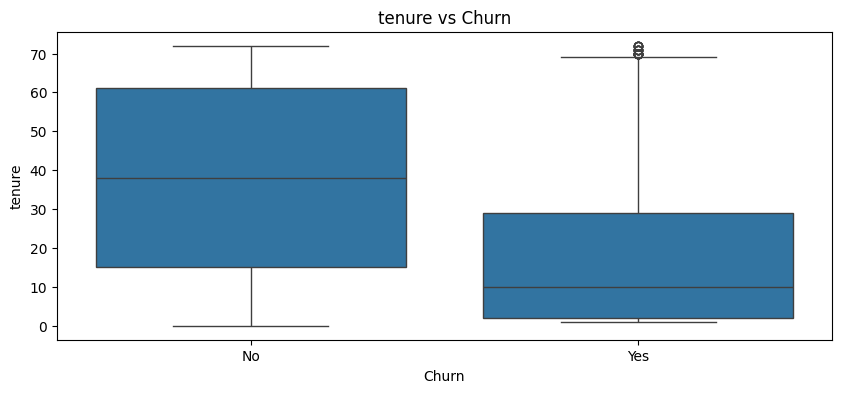

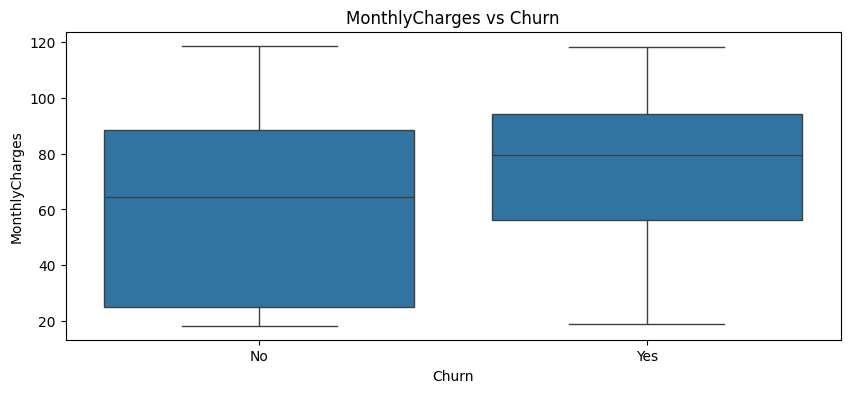

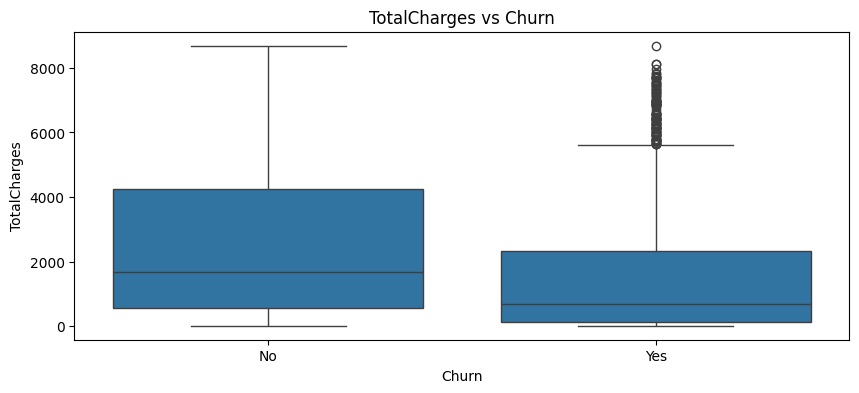

In [62]:
# Взаимосвязь числовых признаков с целевой переменной
def plot_numerical_vs_target(data, numerical_columns, target):
    for column in numerical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=target, y=column, data=data)
        plt.title(f'{column} vs {target}')
        plt.show()

plot_numerical_vs_target(df, numerical_columns, 'Churn')


# FE

In [63]:
import numpy as np
# Преобразование столбца TotalCharges в числовой тип
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Заполнение пропусков медианным значением
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Создание новых признаков, обработка деления на ноль
df['TotalChargesPerMonth'] = np.where(df['tenure'] > 0, df['TotalCharges'] / df['tenure'], 0)

# Преобразование категориальных переменных в числовые с использованием one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

# Масштабирование числовых признаков
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalChargesPerMonth']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Проверка на бесконечные значения
print(np.isfinite(df_encoded[numerical_features]).all())

# Вывод первых строк обработанного дата-сета
print(df_encoded.head())


tenure                  True
MonthlyCharges          True
TotalCharges            True
TotalChargesPerMonth    True
dtype: bool
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0              0 -1.277445       -1.160323     -0.994242   
1              0  0.066327       -0.259629     -0.173244   
2              0 -1.236724       -0.362660     -0.959674   
3              0  0.514251       -0.746535     -0.194766   
4              0 -1.236724        0.197365     -0.940470   

   TotalChargesPerMonth  gender_Male  Partner_Yes  Dependents_Yes  \
0             -1.151302        False         True           False   
1             -0.301458         True        False           False   
2             -0.350966         True        False           False   
3             -0.786053         True        False           False   
4              0.367602        False        False           False   

   PhoneService_Yes  MultipleLines_No phone service  ...  StreamingTV_Yes  \
0             False

C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\3844856293.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# FS

C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\1043854497.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


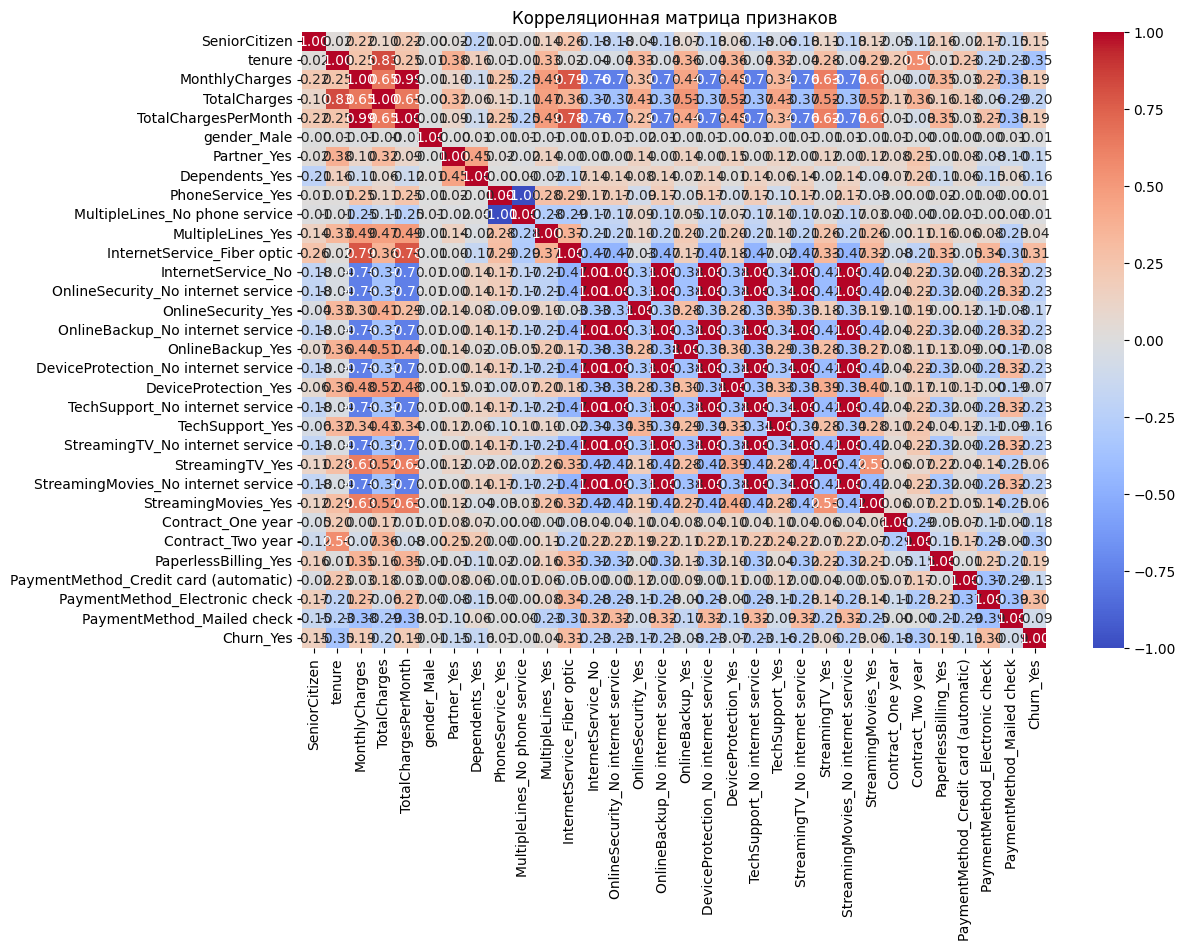

Удаленные признаки: {'TechSupport_No internet service', 'OnlineBackup_No internet service', 'TotalChargesPerMonth', 'OnlineSecurity_No internet service', 'MultipleLines_No phone service', 'DeviceProtection_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'}
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.277445       -1.160323     -0.994242        False   
1              0  0.066327       -0.259629     -0.173244         True   
2              0 -1.236724       -0.362660     -0.959674         True   
3              0  0.514251       -0.746535     -0.194766         True   
4              0 -1.236724        0.197365     -0.940470        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0         True           False             False              False   
1        False           False              True              False   
2        False           False              Tr

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['TotalChargesPerMonth'] = np.where(df['tenure'] > 0, df['TotalCharges'] / df['tenure'], 0)
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalChargesPerMonth']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Корреляционная матрица только для числовых признаков
corr_matrix = df_encoded.corr()

# Тепловая карта корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

# Удаление признаков с высокой корреляцией
threshold = 0.9
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

df_selected = df_encoded.drop(columns=corr_features)
print(f"Удаленные признаки: {corr_features}")
print(df_selected.head())


In [65]:
from sklearn.ensemble import RandomForestClassifier
importances = pd.Series(RandomForestClassifier().fit(df_selected.drop(columns=['Churn_Yes']), df_selected['Churn_Yes']).feature_importances_, index=df_selected.drop(columns=['Churn_Yes']).columns)
important_features = importances[importances > 0.01].index

df_final = df_selected[important_features]
print(f"Отобранные важные признаки: {important_features}")
print(df_final.head())


Отобранные важные признаки: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0 -1.277445       -1.160323     -0.994242        False   
1              0  0.066327       -0.259629     -0.173244         True   
2              0 -1.236724       -0.362660     -0.959674         True   
3              0  0.514251       -0.746535     -0.194766         True   
4              0 -1.236724        0.197365     

# DP

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Преобразование столбца TotalCharges в числовой тип
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Заполнение пропусков медианным значением
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Создание новых признаков, обработка деления на ноль
df['TotalChargesPerMonth'] = np.where(df['tenure'] > 0, df['TotalCharges'] / df['tenure'], 0)

# Преобразование категориальных переменных в числовые с использованием one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

# Масштабирование числовых признаков
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalChargesPerMonth']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Корреляционный анализ и удаление признаков с высокой корреляцией
corr_matrix = df_encoded.corr()
threshold = 0.9
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

df_selected = df_encoded.drop(columns=corr_features)

# Оценка важности признаков с использованием случайного леса
from sklearn.ensemble import RandomForestClassifier
X = df_selected.drop(columns=['Churn_Yes'])
y = df_selected['Churn_Yes']
importances = pd.Series(RandomForestClassifier().fit(X, y).feature_importances_, index=X.columns)
important_features = importances[importances > 0.01].index

# Создание финального набора данных
df_final = df_selected[important_features]
df_final['Churn_Yes'] = y

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns=['Churn_Yes']), df_final['Churn_Yes'], test_size=0.2, random_state=42)

# Вывод размеров наборов данных
print(f"Размер тренировочного набора: {X_train.shape}")
print(f"Размер тестового набора: {X_test.shape}")

# Вывод первых строк тренировочного набора
print(X_train.head())
print(y_train.head())


C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\2753343556.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Размер тренировочного набора: (5634, 22)
Размер тестового набора: (1409, 22)
      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
2142              0 -0.463037        0.002935     -0.417250        False   
1623              0  0.880735        1.078118      1.257128        False   
6074              0 -1.277445       -1.373033     -0.997067         True   
1362              0 -1.155283        0.180747     -0.902370         True   
6754              0 -1.318165       -0.095111     -0.390463         True   

      Partner_Yes  Dependents_Yes  MultipleLines_Yes  \
2142        False            True              False   
1623        False           False               True   
6074         True           False              False   
1362        False           False              False   
6754        False            True               True   

      InternetService_Fiber optic  InternetService_No  ...  \
2142                        False               False  ...   
1623 

C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\2753343556.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Churn_Yes'] = y


# ЧАСТЬ 2

# метрики

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Accuracy: 0.80
Precision: 0.67
Recall: 0.49
F1-Score: 0.56
ROC-AUC: 0.84


Accuracy: Высокая точность модели показывает, что модель в целом правильно предсказывает отток клиентов. Однако, если классы сильно несбалансированы (например, очень мало клиентов покидает), точность может быть вводящей в заблуждение метрикой.

Precision: Важно, чтобы модель правильно идентифицировала тех клиентов, которые уйдут, чтобы бизнес не тратил ресурсы на удержание клиентов, которые и так останутся. Высокая precision минимизирует ложные срабатывания.

Recall: Важно не пропустить тех клиентов, которые действительно уйдут, чтобы бизнес мог принять меры по их удержанию. Высокий recall минимизирует пропуски.

F1-Score: Комбинирует обе метрики (precision и recall), что делает его особенно полезным, когда необходимо найти баланс между ними.

ROC-AUC: Даёт представление о способности модели различать классы (уйдёт/не уйдёт) при различных порогах. Высокий ROC-AUC означает, что модель хорошо различает клиентов, которые уйдут, и которые останутся.

# Построение Моделей

Логистическая регрессия (Logistic Regression)
Случайный лес (Random Forest)
Градиентный бустинг (Gradient Boosting)
Метод опорных векторов (Support Vector Machine, SVM)

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Преобразование столбца TotalCharges в числовой тип
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Заполнение пропусков медианным значением
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Создание новых признаков, обработка деления на ноль
df['TotalChargesPerMonth'] = np.where(df['tenure'] > 0, df['TotalCharges'] / df['tenure'], 0)

# Преобразование категориальных переменных в числовые с использованием one-hot encoding
df_encoded = pd.get_dummies(df.drop(columns=['customerID']), drop_first=True)

# Масштабирование числовых признаков
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalChargesPerMonth']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Корреляционный анализ и удаление признаков с высокой корреляцией
corr_matrix = df_encoded.corr()
threshold = 0.9
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

df_selected = df_encoded.drop(columns=corr_features)

# Оценка важности признаков с использованием случайного леса
from sklearn.ensemble import RandomForestClassifier
X = df_selected.drop(columns=['Churn_Yes'])
y = df_selected['Churn_Yes']
importances = pd.Series(RandomForestClassifier(random_state=42).fit(X, y).feature_importances_, index=X.columns)
important_features = importances[importances > 0.01].index

# Создание финального набора данных
df_final = df_selected[important_features]
df_final['Churn_Yes'] = y

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns=['Churn_Yes']), df_final['Churn_Yes'], test_size=0.2, random_state=42)


C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\13088679.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
C:\Users\nsedoff\AppData\Local\Temp\ipykernel_16084\13088679.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Логистическая регрессия
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_prob_log_reg)

print(f"Logistic Regression - Accuracy: {accuracy_log_reg:.2f}, Precision: {precision_log_reg:.2f}, Recall: {recall_log_reg:.2f}, F1-Score: {f1_log_reg:.2f}, ROC-AUC: {roc_auc_log_reg:.2f}")


Logistic Regression - Accuracy: 0.82, Precision: 0.68, Recall: 0.59, F1-Score: 0.63, ROC-AUC: 0.86


# 

In [70]:
# Случайный лес
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1-Score: {f1_rf:.2f}, ROC-AUC: {roc_auc_rf:.2f}")


Random Forest - Accuracy: 0.80, Precision: 0.67, Recall: 0.49, F1-Score: 0.56, ROC-AUC: 0.84


In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Градиентный бустинг
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

print(f"Gradient Boosting - Accuracy: {accuracy_gb:.2f}, Precision: {precision_gb:.2f}, Recall: {recall_gb:.2f}, F1-Score: {f1_gb:.2f}, ROC-AUC: {roc_auc_gb:.2f}")


Gradient Boosting - Accuracy: 0.81, Precision: 0.67, Recall: 0.54, F1-Score: 0.60, ROC-AUC: 0.86


In [72]:
from sklearn.svm import SVC

# Метод опорных векторов
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

print(f"SVM - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}, F1-Score: {f1_svm:.2f}, ROC-AUC: {roc_auc_svm:.2f}")


SVM - Accuracy: 0.81, Precision: 0.70, Recall: 0.52, F1-Score: 0.59, ROC-AUC: 0.81


# Выбор лучше модели

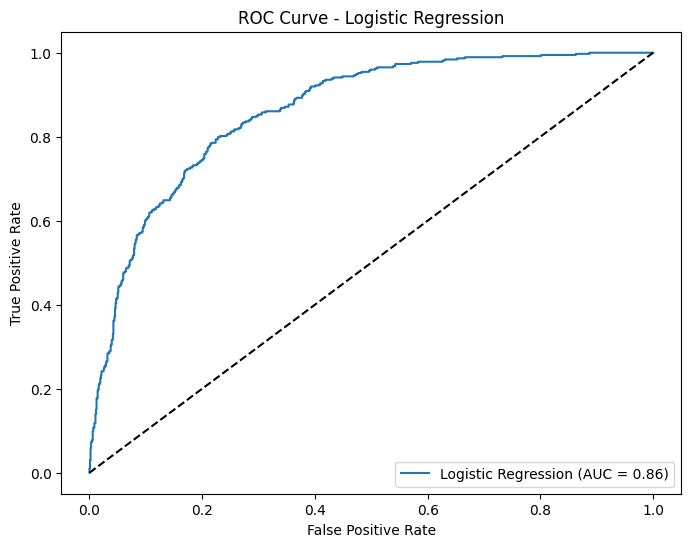

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Построение кривой ROC
log_reg = models["Logistic Regression"]
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_log_reg):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


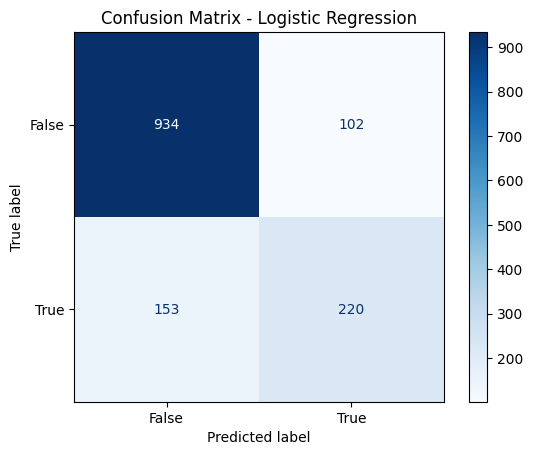

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Матрица ошибок
cm = confusion_matrix(y_test, log_reg.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [75]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')

print(f'Logistic Regression - Cross-Validated AUC: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


Logistic Regression - Cross-Validated AUC: 0.85 ± 0.01


# Ансамблевая модель

In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Создание базовых моделей
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Создание ансамблевой модели (голосование)
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('gb', gb), ('svm', svm)],
    voting='soft'  # Использование вероятностей предсказаний для голосования
)

# Обучение ансамблевой модели
voting_clf.fit(X_train, y_train)

# Предсказания и вычисление метрик
y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Voting Classifier - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")


Voting Classifier - Accuracy: 0.81, Precision: 0.70, Recall: 0.51, F1-Score: 0.59, ROC-AUC: 0.86


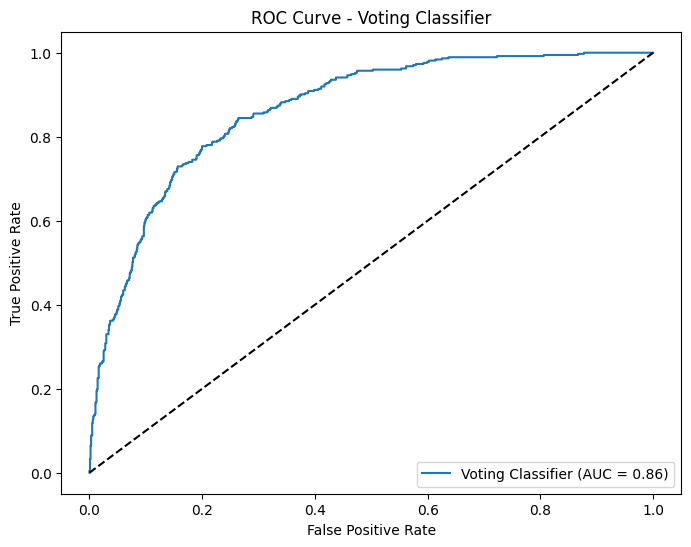

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend(loc='lower right')
plt.show()


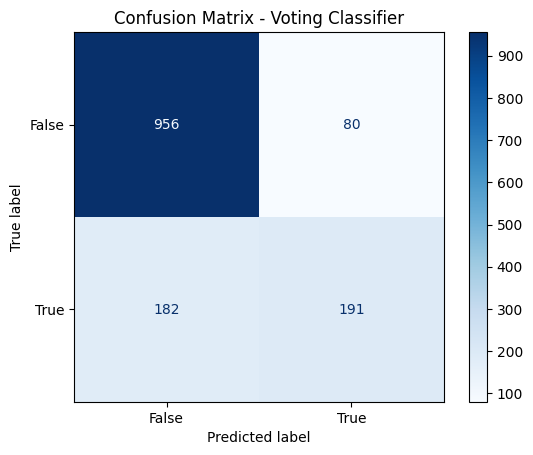

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Voting Classifier')
plt.show()


In [79]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация
cv_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='roc_auc')

print(f'Voting Classifier - Cross-Validated AUC: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


Voting Classifier - Cross-Validated AUC: 0.85 ± 0.01


# Заключение

## Определение задачи и подготовка данных

- **Задача**: Прогнозирование оттока клиентов на основе предоставленных данных.
- **Шаги**:
  - Загрузка и предварительная обработка данных.
  - Преобразование типов данных, заполнение пропусков.
  - Создание новых признаков и масштабирование числовых признаков.

## Разведывательный анализ данных (EDA)

- **Анализ распределения целевой переменной и числовых признаков**.
- **Визуализация**:
  - Построены графики распределения категориальных признаков.
  - Построена корреляционная матрица для выявления взаимосвязей между признаками.

## Отбор признаков (Feature Selection)

- **Корреляционный анализ**: Удаление признаков с высокой корреляцией.
- **Оценка важности признаков**: Использован метод на основе случайного леса для отбора наиболее значимых признаков.

## Построение и оценка моделей машинного обучения

- **Обучение и оценка моделей**:
  - Logistic Regression
  - Random Forest
  - Gradient Boosting
  - SVM
- **Вычисление метрик**:
  - Accuracy
  - Precision
  - Recall
  - F1-Score
  - ROC-AUC
- **Лучшая модель**: Logistic Regression

## Диагностика лучшей модели (Logistic Regression)

- **Кривая ROC и AUC**: Построена кривая ROC и вычислена AUC.
- **Матрица ошибок**: Построена матрица ошибок.
- **Кросс-валидация**: Проведена кросс-валидация для оценки стабильности модели.

## Построение ансамблевой модели (Voting Classifier)

- **Создание ансамблевой модели**: Объединение нескольких базовых моделей (Logistic Regression, Random Forest, Gradient Boosting, SVM) с использованием метода голосования (Voting Classifier).
- **Обучение ансамблевой модели и оценка метрик**.
- **Диагностика ансамблевой модели**:
  - Кривая ROC и AUC.
  - Матрица ошибок.
  - Кросс-валидация.

## Вывод

В результате проведенного анализа и моделирования удалось построить эффективную модель для прогнозирования оттока клиентов. Лучшая модель Logistic Regression показала хорошие результаты по основным метрикам. Для улучшения производительности была создана ансамблевая модель (Voting Classifier), которая объединила несколько базовых моделей и продемонстрировала высокие результаты по метрикам.


